In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 4)
os.chdir('/Users/Jonathan/citiBike_NYC')

In [ ]:
# # Read data from citibikenyc website (https://www.citibikenyc.com/system-data)

# from zipfile import ZipFile
# from StringIO import StringIO
# import urllib2

# # Download all files for 2015
# months = [("%02d" % i) for i in range(1,12)]
# dfs = []
# for i in months:
#     url = "https://s3.amazonaws.com/tripdata/2015" +i + "-citibike-tripdata.zip"
#     print url    
#     r = urllib2.urlopen(url).read()
#     file = ZipFile(StringIO(r))
#     monthlyTripData = file.open("".join(["2015",i,"-citibike-tripdata.csv"]))
#     dfs.append(pd.read_csv(monthlyTripData))

In [ ]:
# # Save all DFs
# import pickle

# with open('objs.pickle', 'w') as f:
#     pickle.dump([dfs], f)

In [ ]:
# # Load all DFs
# import pickle

# with open('objs.pickle') as f:
#     dfs = pickle.load(f)

In [ ]:
# # Read data for all of 2015
# months = [("%02d" % i) for i in range(1,12)]
# dfs = []
# for i in months:
#     file = "2015" +i +"-citibike-tripdata.csv"
#     print file    
#     monthlyTripData = pd.read_csv("".join(['data/',file]))
#     dfs.append(monthlyTripData)

In [ ]:
# Read data only for November 2015
tripData = pd.read_csv('data/201511-citibike-tripdata.csv')
tripData.head()

In [ ]:
tripData.dtypes

In [ ]:
tripData.shape

In [ ]:
# Parse dates
from datetime import datetime

a = tripData.starttime[0]
print a
datetime.now()
#datetime.strptime(a,'%m/%d/%Y')
#datetime.datetime(2010,1,1,0,0)
b = datetime.strptime(a,"%m/%d/%Y %H:%M:%S")
b

In [ ]:
# dates = [datetime.strptime(x,"%m/%d/%Y %H:%M:%S") for x in tripData.starttime]
# dates[:10]

# can also use:
# from dateutil.parser import parse
# [parse(x) for x in data.starttime]

In [ ]:
# from dateutil.parser import parse
# new = pd.Series(np.random.randn(100), index = pd.date_range(parse(data.starttime[0]),periods = 100))
# new.plot()

In [ ]:
# How many bikes are there?
len((tripData.bikeid.unique()))

In [ ]:
# Proportion of male / female (0 is unknown)
(tripData.gender.value_counts() / tripData.gender.shape[0] * 100).round(2)

In [ ]:
# Proportion of Subscribers
(tripData.usertype.value_counts() / tripData.usertype.shape[0] * 100).round(2)

In [ ]:
# tripData['birth year'].plot(kind='hist')
tripData[tripData['birth year'] > 1930]['birth year'].plot(kind = 'hist')

In [ ]:
# Enter trip duration:
trip_duration_in_minutes = 10

trip_duration = trip_duration_in_minutes * 60.0
x = tripData[tripData.tripduration > trip_duration].shape[0] / float(tripData.shape[0]) * 100
x = round(x,2)
print str(x) +" percent of trips were longer than " + str(trip_duration_in_minutes) +" minutes"

In [ ]:
#------------------------------------------------------------------------------------------------#

In [ ]:
# Get only the first 100 rows
data = tripData.ix[:99,:].copy()
data

In [ ]:
# number of trips by subscriber type & gender
sns.countplot(x = 'usertype', hue = 'gender', data=tripData)

In [ ]:
# trip duration by subscriber type & gender
sns.stripplot(x="usertype", y="tripduration", data=tripData, hue='gender', jitter=0.05);

In [ ]:
data.groupby('gender').tripduration.sum()

In [ ]:
# url = 'https://www.citibikenyc.com/stations/json'
# all_stations = pd.read_json(url)['stationBeanList']

# # all_stations = all_stations.apply(lambda x: x['stationName'])

# # # decode html
# # html_parser = HTMLParser.HTMLParser()
# # my_unique_stations_decoded = my_unique_stations.apply(html_parser.unescape)

# # # exclude visited stations
# # not_visited_station = lambda x: x not in my_unique_stations_decoded.values
# # not_visited_stations = all_stations.apply(not_visited_station)

In [ ]:
import urllib2
url = 'https://www.citibikenyc.com/stations/json'
request = urllib2.Request(url)
response = urllib2.urlopen(request)
jsonData = response.read()

In [ ]:
# Anoter way of reading the data
jsonData = pd.read_json(url)
jsonData.ix[:,1][0]['id']

In [ ]:
import urllib2
from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize

url = 'https://www.citibikenyc.com/stations/json'
all_stations = pd.read_json(url)['stationBeanList']
x = urllib2.urlopen(url)

In [ ]:
# Read Json using the requests package
import requests
r = requests.get(url)
r.text
r.json()
r.json().keys()
r.json()['executionTime']
r.json()['stationBeanList']
len(r.json()['stationBeanList']) # 507 docks
r.json()['stationBeanList'] [0] # First key/station
from pandas.io.json import json_normalize
df = json_normalize(r.json()['stationBeanList'])

print r.json()['executionTime']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(df['availableBikes'])
ax1.set_title('availableBikes')
ax2.hist(df['totalDocks'])
ax2.set_title('totalDocks')

In [ ]:
df.shape
df.columns
df.statusValue.unique()  # array([u'In Service', u'Not In Service'], dtype=object)
len(df[df.statusValue=='Not In Service']) / float(len(df[df.statusValue=='In Service']))

In [ ]:
# 5. Create SQLite database.
# 5a. create data table to store data:

In [ ]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(7)


# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHI"))
y1 = np.arange(1, 10)
sns.barplot(x, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5
sns.barplot(x, y2, palette="RdBu_r", ax=ax2)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, 9, replace=False)
sns.barplot(x, y3, palette="Set3", ax=ax3)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=3)

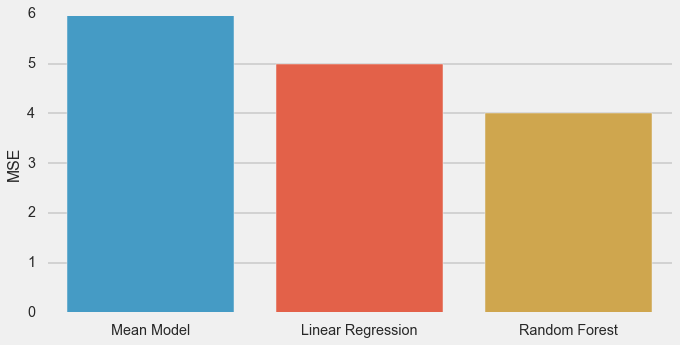

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from datetime import datetime
import cPickle
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("poster",font_scale = 0.9)
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(['Mean Model','Linear Regression','Random Forest'],[6,5,4])
sns.axlabel('','MSE')